In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from patsy import bs, dmatrix
import statsmodels.api as sm
from scipy.integrate import quad
from scipy.optimize import *

In [2]:
np.random.seed(42)
h = lambda x: (1/pi)*np.arcsin(x**(1/3)) + (1/pi)*np.arcsin(x**(1/6))
f = lambda x: x*np.sin(20*x)
x = np.linspace(0,1,1000)
y = f(h(x)) + np.random.randn(1000)*0.3

In [3]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))
# ax1.plot(x, h(x), "r")
# ax1.grid()
# ax2.plot(x, f(x), "g")
# ax2.grid()
# plt.show()

In [4]:
# def find_sumsquareerror_of_hhat_under_fixed_knots(theta):
#     knots = np.arange(1, 8) / 8
#     bxs = bs(x=x, knots=knots, lower_bound=0,
#              upper_bound=1, include_intercept=True,
#              degree=3)
    
#     ans = bxs @ theta.reshape((-1, 1))
#     ans = ans.flatten()
#     return np.sum((y - f(ans))**2)

In [5]:
# bx = bs(x=x, knots=np.arange(1, 8) / 8, lower_bound=0,
#         upper_bound=1, include_intercept=True,
#         degree=3)

# mod = sm.OLS(h(x), bx)
# res = mod.fit()

# print(find_sumsquareerror_of_hhat_under_fixed_knots(res.params))
# print(res.params)

In [6]:
# opti = minimize(find_sumsquareerror_of_hhat_under_fixed_knots, res.params,
#                 method='Nelder-Mead', options={'maxiter':50})
# print(opti.fun, "\n", opti.x)

In [7]:
# def opti_hhat():
#     ans = bx @ opti.x
#     return ans
# plt.figure(figsize=(16,9))
# plt.plot(x, h(x), "r",
#          x, opti_hhat(), "b")
# plt.grid()
# plt.show()

In [11]:
opti_value_list = []
opti_array_list = []

for i in range(2, 9):
    bxi = bs(x=x, knots=np.arange(1, 2**i) / 2**i, lower_bound=0,
            upper_bound=1, include_intercept=True,
            degree=3)
    
    def find_least_sumsquareerror_of_h_under_fixed_knots(theta):
        knots = np.arange(1, 2**i) / 2**i        
        ans = bxi @ theta.reshape((-1, 1))
        ans = ans.flatten()
        return np.sum((y - f(ans))**2)
    
    modi = sm.OLS(h(x), bxi)
    resi = modi.fit()
    opt = minimize(find_least_sumsquareerror_of_h_under_fixed_knots, resi.params,
                   method='Nelder-Mead', options={'maxiter':50})
    # print(f"\noptimal value {i}:", opt.fun, f"\noptimal vector {i}:", opt.x)
    opti_value_list.append(opt.fun)
    opti_array_list.append(opt.x)

In [12]:
print("least sun square error:", min(opti_value_list))
print("Index:", opti_value_list.index(min(opti_value_list)))

least sun square error: 84.69107473472354
Index: 3


In [13]:
print(opti_value_list)

[87.29267366406214, 85.87877639148786, 85.89492265357217, 84.69107473472354, 85.7381322633967, 85.44131835590632, 85.36071059378237]


In [14]:
print(opti_array_list[3]) # 32-1個knots

[0.09995436 0.27463113 0.28196007 0.35981584 0.38535191 0.42266983
 0.443208   0.46726612 0.48827708 0.51291532 0.5315923  0.54975616
 0.56694338 0.5836563  0.59816809 0.60954329 0.62510942 0.64017095
 0.65297326 0.67526432 0.69202097 0.70724026 0.72262088 0.73109664
 0.75033293 0.76587259 0.77972444 0.79772553 0.81719679 0.8346738
 0.82221867 0.885042   0.9218932  0.9431147  0.99134901]


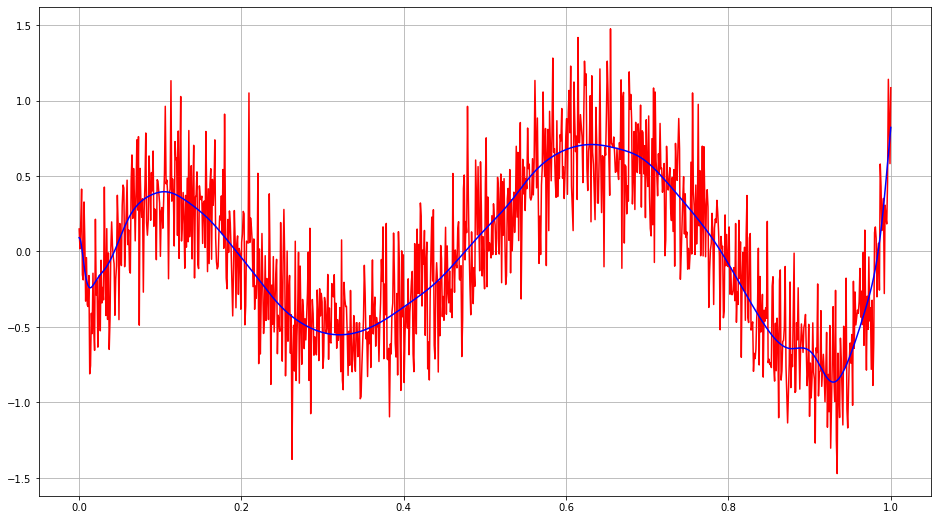

In [16]:
i = opti_value_list.index(min(opti_value_list))
knots = np.arange(1, 2**(i+2)) / 2**(i+2)
min_sse_bx = bs(x=x, knots=knots, lower_bound=0,
                upper_bound=1, include_intercept=True,
                degree=3)
hhat = min_sse_bx @ opti_array_list[i].reshape((-1, 1))
fhhat = f(hhat.flatten())

plt.figure(figsize=(16, 9))
plt.plot(x, y, "r",
         x, fhhat, "b")
plt.grid()
plt.show()